## Author : Priteshkumar Gohil

In [24]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [50]:
def find_files_count(dir,folder_name, extension):
#     print("path = ", dir)
    d = os.path.join(dir,folder_name)
#     print("joined path = ", d)
    if not os.path.isdir(d):
        raise ValueError("invalid path")
    image_files = 0
    tactile_files = 0
    position_files = 0
    label_files = 0
    video_files = 0
    for root, _, fnames in os.walk(d):
        for fname in sorted(fnames):
            path = os.path.join(root, fname)
            if(path.lower().endswith(extensions[0])):
                image_files += 1
            elif(path.lower().endswith(extensions[1])):
                tactile_files += 1
            elif(path.lower().endswith(extensions[2])):
                position_files += 1
            elif(path.lower().endswith(extensions[3])):
                label_files += 1
            elif(path.lower().endswith(extensions[4])):
                video_files +=1
    return image_files,tactile_files,position_files,label_files,video_files

In [42]:
path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(path) if d.is_dir()]
else:
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
classes
class_to_idx = {classes[i]: i for i in range(len(classes))}
extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','front_rgb.mp4')
class_to_idx

{'Cheez': 0,
 'Coffeecup': 1,
 'Cola': 2,
 'Crisp': 3,
 'Latte': 4,
 'Scrub': 5,
 'Suger': 6,
 'Tomato': 7,
 'Water': 8,
 'Yellow': 9}

In [46]:
folder_name = classes[0]
find_files_count(path,folder_name,extensions)
class_to_idx ={} 
for folder in classes:
    images,tactile,pos,label,video = find_files_count(path,folder,extensions)
    if folder=='Suger':
        folder = 'Sugar'
    class_to_idx[folder] = (images,tactile,pos,label,video)
#     class_to_idx[folder] = find_files_count(path,folder_name,extensions)
print("{Name: (images, tactile.txt, pos.txt, label.txt, videos)}")
class_to_idx

{Name: (images, tactile.txt, pos.txt, label.txt, videos)}


{'Cheez': (716, 179, 179, 179, 119),
 'Coffeecup': (1080, 270, 270, 270, 180),
 'Cola': (1080, 270, 270, 270, 180),
 'Crisp': (1080, 270, 270, 270, 180),
 'Latte': (1080, 270, 270, 270, 180),
 'Scrub': (1080, 270, 270, 270, 179),
 'Sugar': (1040, 260, 260, 260, 170),
 'Tomato': (1040, 270, 270, 270, 170),
 'Water': (840, 210, 210, 210, 120),
 'Yellow': (1080, 270, 270, 270, 180)}

In [10]:
total_vid = 0
total_img = 0
total_tactile = 0
total_pos = 0
total_label = 0
for k, v in class_to_idx.items():
    total_img += v[0]
    total_tactile += v[1]
    total_pos += v[2]
    total_label += v[3]
    total_vid += v[4]
#     print("{{{0}: {1}}}".format(k, sum(v)))
print("Total image ",total_img)
print("total_tactile ",total_tactile)
print("total_pos ",total_pos)
print("total_label ",total_label)
print("Total videos ",total_vid)

Total image  10116
total_tactile  2539
total_pos  2539
total_label  2539
Total videos  1658


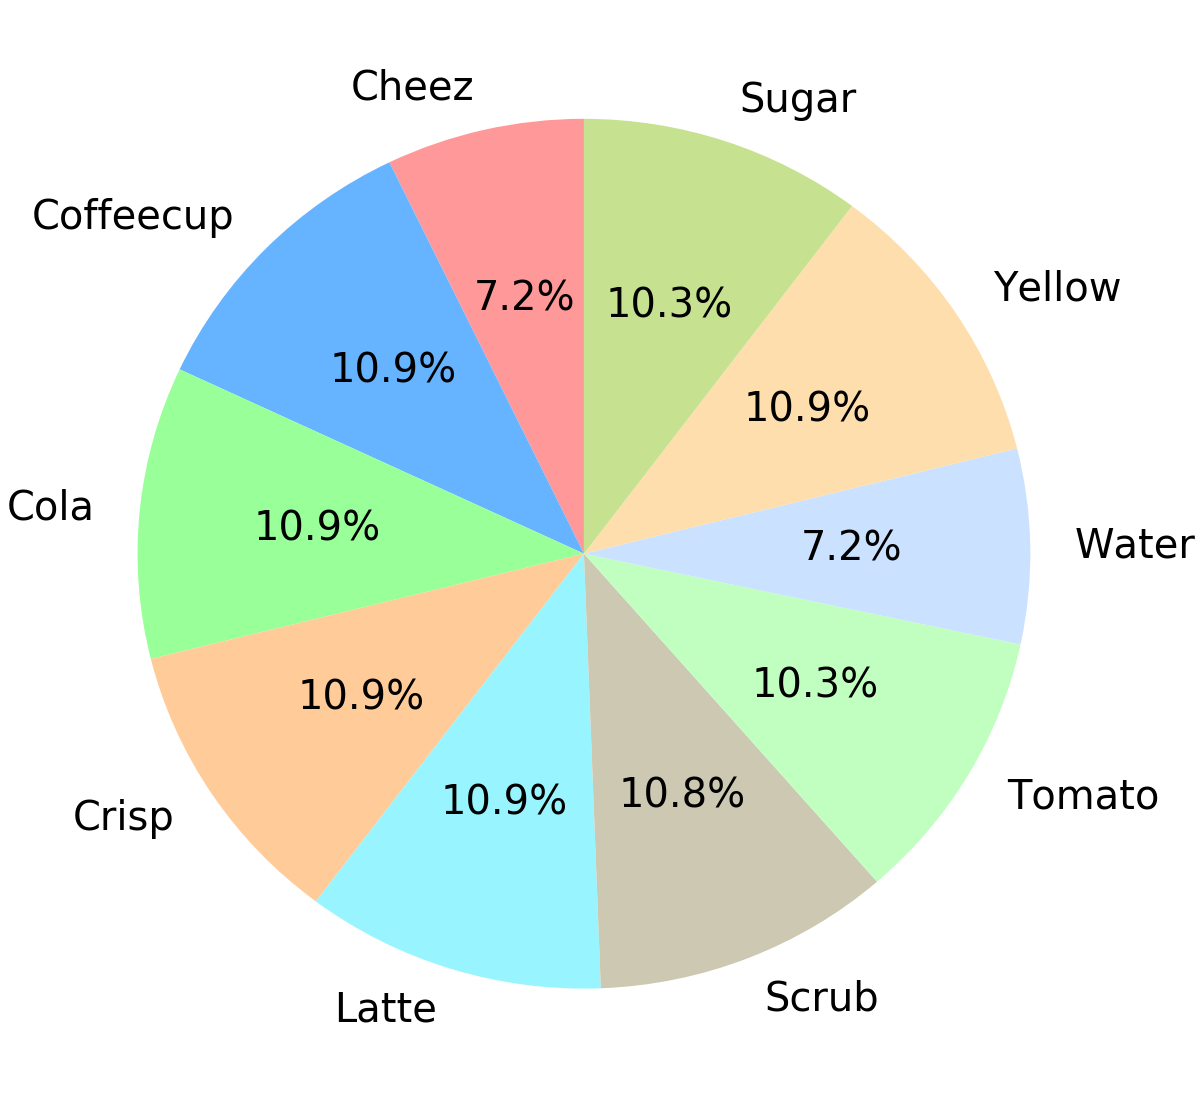

In [13]:
# plot pie chart
objects = []
items = []
for k, v in class_to_idx.items():
    objects.append(k)
    items.append(v[4])
    
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']

plt.figure(figsize=(20,20))
plt.pie(items, labels=objects, startangle=90, autopct='%.1f%%', colors=colors,textprops={'fontsize': 40})
# plt.title('Data distribution video wise')
plt.savefig("../images/pieChart.png")
plt.show()

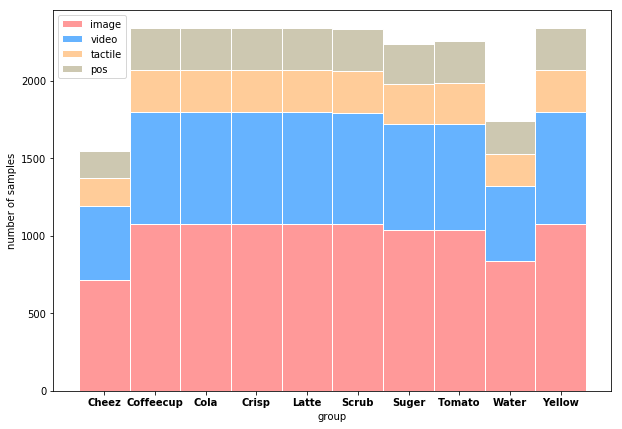

In [76]:
# stacked bar plot
objects = []
video = []
img = []
tactile = []
pos =[]
for k, v in class_to_idx.items():
    objects.append(k)
    img.append(v[0])
    tactile.append(v[1])
    pos.append(v[2])
    video.append(v[4])

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']

# The position of the bars on the x-axis
r = range(len(objects))

barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
plt.bar(r, img, color=colors[0], edgecolor='white', width=barWidth, label="image")
plt.bar(r, video, bottom=np.array(img), color=colors[1], edgecolor='white', width=barWidth, label='video')
plt.bar(r, tactile, bottom=np.array(img)+np.array(video), color=colors[3], edgecolor='white', width=barWidth, label='tactile')
plt.bar(r, pos, bottom=np.array(img)+np.array(video)+np.array(tactile), color=colors[5], edgecolor='white', width=barWidth, label='pos')
plt.legend()

# Custom X axis
plt.xticks(r, objects, fontweight='bold')
plt.xlabel("group")
plt.ylabel("number of samples")
# plt.savefig("../images/barChart2.png")
plt.show()

{Name: (images, tactile.txt, pos.txt, label.txt, videos)}


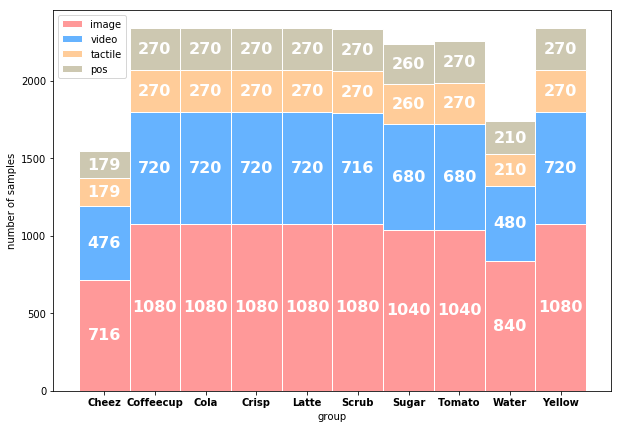

In [52]:
path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(path) if d.is_dir()]
else:
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
classes
class_to_idx = {classes[i]: i for i in range(len(classes))}
extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','.mp4')

folder_name = classes[0]
find_files_count(path,folder_name,extensions)
class_to_idx={}
for folder in classes:
    images,tactile,pos,label,video = find_files_count(path,folder,extensions)
    if folder=='Suger':
        folder = 'Sugar'
    class_to_idx[folder] = (images,tactile,pos,label,video)
#     class_to_idx[folder] = find_files_count(path,folder_name,extensions)
print("{Name: (images, tactile.txt, pos.txt, label.txt, videos)}")
class_to_idx

# Stacked Bar Chart with Centered Labels
objects = []
video = []
img = []
tactile = []
pos =[]
for k, v in class_to_idx.items():
    objects.append(k)
    img.append(v[0])
    tactile.append(v[1])
    pos.append(v[2])
    video.append(v[4])

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']
# colors = ['#ffdae7','#66b3ff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']


# The position of the bars on the x-axis
total_bars = range(len(objects))

barWidth = 1

#plot bars
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax1 = ax.bar(total_bars, img, color=colors[0], edgecolor='white', width=barWidth, label="image")
ax2 = ax.bar(total_bars, video, bottom=np.array(img), color=colors[1], edgecolor='white', width=barWidth, label='video')
ax3 = ax.bar(total_bars, tactile, bottom=np.array(img)+np.array(video), color=colors[3], edgecolor='white', width=barWidth, label='tactile')
ax4 = ax.bar(total_bars, pos, bottom=np.array(img)+np.array(video)+np.array(tactile), color=colors[5], edgecolor='white', width=barWidth, label='pos')
ax.legend(loc='upper left')

# Custom X axis
plt.xticks(total_bars, objects, fontweight='bold')
plt.xlabel("group")
plt.ylabel("number of samples")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 +h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

plt.savefig("../images/barChart.png")
plt.show()

In [47]:
# count back, right, and top pickup mode
def find_files_count(dir,folder_name, extension):
    d = os.path.join(dir,folder_name)
    if not os.path.isdir(d):
        raise ValueError("invalid path")
    back = 0
    right = 0
    top = 0
    for root, _, fnames in os.walk(d):
        for fname in sorted(fnames):
            path = os.path.join(root, fname)
            if("back" in path):
                if(path.lower().endswith(extensions[4])):
                    back +=1
            elif("right" in path):
                if(path.lower().endswith(extensions[4])):
                    right +=1
            elif("top" in path):
                if(path.lower().endswith(extensions[4])):
                    top +=1
    return back, right, top


path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(path) if d.is_dir()]
else:
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
classes
class_to_idx = {classes[i]: i for i in range(len(classes))}
extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','front_rgb.mp4')


#now get the count
class_to_idx = {}
folder_name = classes[0]
find_files_count(path,folder_name,extensions)
for folder in classes:
    back, right, top = find_files_count(path,folder,extensions)
    if folder=='Suger':
        folder = 'Sugar'
    class_to_idx[folder] = (back, right, top)
#     class_to_idx[folder] = find_files_count(path,folder_name,extensions)
print("{Name: (back, right, top)}")
class_to_idx



{Name: (back, right, top)}


{'Cheez': (0, 60, 59),
 'Coffeecup': (60, 60, 60),
 'Cola': (60, 60, 60),
 'Crisp': (60, 60, 60),
 'Latte': (60, 60, 60),
 'Scrub': (59, 60, 60),
 'Sugar': (50, 60, 60),
 'Tomato': (60, 50, 60),
 'Water': (60, 60, 0),
 'Yellow': (60, 60, 60)}

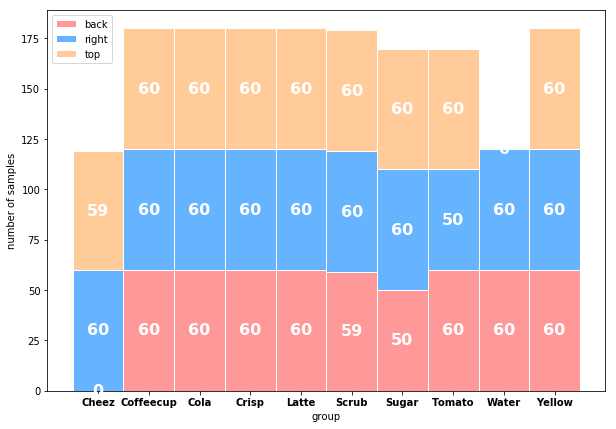

In [48]:
#Now plot the stacked bar chart
# Stacked Bar Chart with Centered Labels
objects = []
back = []
right = []
top = []
for k, v in class_to_idx.items():
    objects.append(k)
    back.append(v[0])
    right.append(v[1])
    top.append(v[2])

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']
# colors = ['#ffdae7','#d0eeff','#99ff99','#ffcc99','#98F5FF','#CDC8B1','#C1FFC1','#CAE1FF','#FFDEAD','#C6E290']

# The position of the bars on the x-axis
total_bars = range(len(objects))

barWidth = 1

#plot bars
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax1 = ax.bar(total_bars, back, color=colors[0], edgecolor='white', width=barWidth, label="back")
ax2 = ax.bar(total_bars, right, bottom=np.array(back), color=colors[1], edgecolor='white', width=barWidth, label='right')
ax3 = ax.bar(total_bars, top, bottom=np.array(back)+np.array(right), color=colors[3], edgecolor='white', width=barWidth, label='top')
ax.legend(loc='upper left')

# Custom X axis
plt.xticks(total_bars, objects, fontweight='bold')
plt.xlabel("group")
plt.ylabel("number of samples")

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")


plt.savefig("../images/barChart_pickupMode.png")
plt.show()

# Visualize dataset objects as thumbnail images in the tensorboard writer

In [14]:
import tensorboardX
writer = tensorboardX.SummaryWriter(logdir="data/runs/",filename_suffix="objectVisualize")


In [38]:
import torchvision
import os
import sys
import torch

def video_to_tensor(frames):
    """Convert a ``numpy.ndarray`` to tensor.
    Converts a numpy.ndarray (T x H x W x C)
    to a torch.FloatTensor of shape (C x T x H x W)

    Args:
         pic (numpy.ndarray): Video to be converted to tensor.
    Returns:
         Tensor: Converted video.
    """
    return torch.from_numpy(frames.transpose([0,3,1,2]))

for path, _, files in os.walk("../../Visual-Tactile_Dataset/objects/"):
    images = []
    for f in files:
        im_path = os.path.join(path,f)
        img = PIL.Image.open(im_path)
        images.append(np.asanyarray(img))
image_tensor = video_to_tensor(np.array(images))
print(image_tensor.shape)
x = torchvision.utils.make_grid(image_tensor,nrow=5,scale_each=True)
writer.add_image("Objects/", x, 0)
writer.close()

torch.Size([10, 3, 480, 640])


# 2.1 Code to extract the valid folders, Which is used to devide into training and testing set

In [ ]:
def find_valid_path(dir,folder_name, extension,path_list):
    d = os.path.join(dir,folder_name)
    if not os.path.isdir(d):
        raise ValueError("invalid path")
    image_files = 0
    tactile_files = 0
    position_files = 0
    label_files = 0
    video_files = 0
    for root, _, fnames in os.walk(d):
        image_files = 0
        tactile_files = 0
        position_files = 0
        label_files = 0
        video_files = 0
        for fname in sorted(fnames):
            path = os.path.join(root, fname)
            if(path.lower().endswith(extensions[0])):
                image_files += 1
            elif(path.lower().endswith(extensions[1])):
                tactile_files += 1
            elif(path.lower().endswith(extensions[2])):
                position_files += 1
            elif(path.lower().endswith(extensions[3])):
                label_files += 1
            elif(path.lower().endswith(extensions[4])):
                video_files +=1
        if(image_files and tactile_files and position_files and label_files and video_files):
                path_list.append(path)
    return path_list

In [ ]:
## do not run this code, since we got the train and test files
# path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
# if sys.version_info >= (3, 5):
#     # Faster and available in Python 3.5 and above
#     classes = [d.name for d in os.scandir(path) if d.is_dir()]
# else:
#     classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
# class_to_idx = {classes[i]: i for i in range(len(classes))}
# extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','rgb.mp4')

# folder_name = classes[0]

# valid_path=[]
# for folder in classes:
#     path_list = [] 
#     valid_path.append(find_files_count(path,folder,extensions, path_list))

# #remove first and last few lines
# filtered_path_list = []
# for obj in valid_path:
#     for i in obj:
# #         filtered_path_list.append(i[52:-11])
#         filtered_path_list.append(i[28:-11])
# random.shuffle(filtered_path_list)
# print("total data : ", len(filtered_path_list))

# #selecting train and test split
# train_data = []
# test_data = []
# count = 1
# split_ratio = 80//20
# if split_ratio<5:
#     for path in filtered_path_list:
#         #if user ask for no split, return all the data as it is
#         if(count%(split_ratio+1))==0 :
#             test_data.append(path)
#         else:
#             train_data.append(path)
#         count += 1
# #     else:
# #         return filtered_path_list
# print("train data : ", len(train_data))
# print("test data : ", len(test_data))

# #save the result into file
# with open('pytorch-i3d/train.txt', 'w') as f:
#     for item in train_data:
#         f.write("%s\n" % item)
# with open('pytorch-i3d/test.txt', 'w') as f:
#     for item in test_data:
#         f.write("%s\n" % item)

# 2.2 split test-train data according to objects

In [ ]:
# do not run this code, since we got the train and test files
path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    folders = [d.name for d in os.scandir(path) if d.is_dir()]
else:
    folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
class_to_idx = {classes[i]: i for i in range(len(classes))}
extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','rgb.mp4')

folder_name = folders[0]

print(folders)
valid_test_path=[]
valid_train_path=[]
for folder in folders:
    path_list = []
    if(folder == 'Cola' or folder == 'Scrub'):
        valid_test_path.append(find_valid_path(path,folder,extensions, path_list))
    else:
        valid_train_path.append(find_valid_path(path,folder,extensions, path_list))

   
# remove first and last few lines
train_data = []
test_data = []
#valid_train or test_path contains the path to datafolder according to classes. So convert this list of list into single list.
for obj in valid_test_path:
    for i in obj:
        test_data.append(i[28:-11])
        
for obj in valid_train_path:
    for i in obj:
        train_data.append(i[28:-11])
random.shuffle(test_data)
random.shuffle(train_data)
print("train data : ", len(train_data))
print("test data : ", len(test_data))

#save the result into file
with open('master_i3d/trainv3.txt', 'w') as f:
    for item in train_data:
        f.write("%s\n" % item)
with open('master_i3d/testv3.txt', 'w') as f:
    for item in test_data:
        f.write("%s\n" % item)

# 2.3 split test-train data according to objects

In [ ]:
# do not run this code, since we got the train and test files
path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
if sys.version_info >= (3, 5):
    # Faster and available in Python 3.5 and above
    classes = [d.name for d in os.scandir(path) if d.is_dir()]
else:
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
class_to_idx = {classes[i]: i for i in range(len(classes))}
extensions = ('.jpg','tactile.txt', 'pos.txt','label.txt','rgb.mp4')

folder_name = classes[0]

valid_path=[]
for folder in classes:
    path_list = [] 
    valid_path.append(find_valid_path(path,folder,extensions, path_list))

#remove first and last few lines
filtered_path_list = []
for obj in valid_path:
    for i in obj:
#         filtered_path_list.append(i[52:-11])
        filtered_path_list.append(i[28:-11])
random.shuffle(filtered_path_list)
print("total data : ", len(filtered_path_list))

#selecting train and test split
train_data = []
test_data = []
count = 1
for path in filtered_path_list:
    #if user ask for no split, return all the data as it is
    if("back" in path):
        test_data.append(path)
    else:
        train_data.append(path)
print("train data : ", len(train_data))
print("test data : ", len(test_data))

#save the result into file
with open('master_i3d/trainv4.txt', 'w') as f:
    for item in train_data:
        f.write("%s\n" % item)
with open('master_i3d/testv4.txt', 'w') as f:
    for item in test_data:
        f.write("%s\n" % item)

# Checking total success and failure in the test and train data

In [5]:
# test_data = np.loadtxt("master_i3d/testv2.txt",dtype=str)
# train_data = np.loadtxt("master_i3d/trainv2.txt",dtype=str)
train_data = np.loadtxt("master_i3d/resnet_trainv2_50percent.txt",dtype=str)
test_data = np.loadtxt("master_i3d/testv2.txt",dtype=str)
test_len = len(test_data)
train_len = len(train_data)

path = "/media/pritesh/Entertainment/Visual-Tactile_Dataset/dataset/"
prefix = path.split(test_data[0][:32])[0]
success_in_test, success_in_train, failure_in_test, failure_in_train = 0,0,0,0

for i,data in enumerate(test_data):
    label = np.loadtxt(prefix+data+'label.txt')[3]
    if (label ==0.):
        failure_in_test +=1
    else:
        success_in_test +=1
    
    sys.stdout.write("\rTest: {} % completed".format(((i+1)/test_len)*100))
    sys.stdout.flush()
        
for i,data in enumerate(train_data):
    label = np.loadtxt(prefix+data+'label.txt')[3]
    if (label ==0.):
        failure_in_train +=1
    else:
        success_in_train +=1
        
    sys.stdout.write("\rTrain: {} % completed".format(((i+1)/train_len)*100))
    sys.stdout.flush()

print("\n Fail lable in test == {} and Success label in test == {}".format(failure_in_test,success_in_test))
print("Fail lable in train == {} and Success label in train == {}".format(failure_in_train,success_in_train))

Train: 100.0 % completed% completedddd
 Fail lable in test == 173 and Success label in test == 159
Fail lable in train == 430 and Success label in train == 398


In [ ]:
t = np.loadtxt("master_i3d/trainv2.txt", dtype='str')
p = np.loadtxt("master_i3d/testv2.txt", dtype='str')
len(t)

# Max of tactile data per channel

In [3]:
tac_train_path = np.loadtxt("master_i3d/trainv2.txt", dtype='str')
tac_test_path = np.loadtxt("master_i3d/testv2.txt", dtype='str')


In [ ]:
# getting max from test list
datapt = len(tac_test_path)
max_tactile_test = np.arange(16)
for i, path in enumerate(tac_test_path):
    directory = '../..' + path.replace('dataset', 'tactile_data') + 'tactile.txt'
    tactile = np.loadtxt(directory)
    a = np.max(tactile,axis=0) #get maximum from each channel
    for j in range(16):        #update main list containing maximum from all other readings
        if(a[j]>max_tactile_test[j]):
            max_tactile_test[j]=a[j]
    sys.stdout.write("\rstatus {} % completed".format(((i+1)/datapt)*100))
    sys.stdout.flush()
print(max_tactile_test)

In [ ]:
# getting max from train list
datapt = len(tac_train_path)
max_tactile_train = np.arange(16)
for i, path in enumerate(tac_train_path):
    directory = '../..' + path.replace('dataset', 'tactile_data') + 'tactile.txt'
    tactile = np.loadtxt(directory)
    a = np.max(tactile,axis=0) #get maximum from each channel
    for j in range(16):        #update main list containing maximum from all other readings
        if(a[j]>max_tactile_train[j]):
            max_tactile_train[j]=a[j]
    sys.stdout.write("\rstatus {} % completed".format(((i+1)/datapt)*100))
    sys.stdout.flush()
print(max_tactile_train)

In [ ]:
#now merge both  of these results
TACTILE_MAX = np.max(np.stack((max_tactile_test,max_tactile_train)), axis=0)
TACTILE_MAX

# Max of Position data per channel

In [4]:
# getting max from test list
datapt = len(tac_test_path)
max_pos_test = np.arange(8)
for i, path in enumerate(tac_test_path):
    directory = '../..' + path + 'pos.txt'
    pose = np.loadtxt(directory)
    a = np.max(pose,axis=0) #get maximum from each channel
    for j in range(8):        #update main list containing maximum from all other readings
        if(a[j]>max_pos_test[j]):
            max_pos_test[j]=a[j]
    sys.stdout.write("\rstatus {} % completed".format(((i+1)/datapt)*100))
    sys.stdout.flush()
print(max_pos_test)

status 100.0 % completed % completeddd[17 90 25 95 14 87  9 13]


In [5]:
# getting max from test list
datapt = len(tac_train_path)
max_pos_train = np.arange(8)
for i, path in enumerate(tac_train_path):
    directory = '../..' + path + 'pos.txt'
    pose = np.loadtxt(directory)
    a = np.max(pose,axis=0) #get maximum from each channel
    for j in range(8):        #update main list containing maximum from all other readings
        if(a[j]>max_pos_train[j]):
            max_pos_train[j]=a[j]
    sys.stdout.write("\rstatus {} % completed".format(((i+1)/datapt)*100))
    sys.stdout.flush()
print(max_pos_train)

status 100.0 % completed % completeddd[ 20  91  24 109  54  87  12  21]


In [7]:
#now merge both  of these results
POS_MAX = np.max(np.stack((max_pos_train,max_pos_test)), axis=0)
POS_MAX

array([ 20,  91,  25, 109,  54,  87,  12,  21])

# upsampling pose data and visualizing effect

In [ ]:
p = '../../Visual-Tactile_Dataset/dataset/Cheez/100_432/right/0/pos.txt'
d = np.loadtxt(p)
np.max(d, axis=0)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(d)

In [ ]:
#upsampling pos.txt data from 400 to 432
from scipy import signal
TACTILE_TIME = 24
UPSAMPLE_FREQ = 18
up_samples=TACTILE_TIME*UPSAMPLE_FREQ
dup = signal.resample(d,up_samples)
plt.figure(figsize=(15,5))
plt.plot(dup)
dup.shape

# Image of 18 frame tactile and pose data

Find at resnet/resnetT1/dataset.ipynb

In [12]:
import numpy as np
a = np.array([[4,5,6],
              [44,55,66.0],
              [400,500,600],
              [4000,5000,6000]])
maximum = np.max(a,axis=0)
maximum
a/maximum

array([[0.001, 0.001, 0.001],
       [0.011, 0.011, 0.011],
       [0.1  , 0.1  , 0.1  ],
       [1.   , 1.   , 1.   ]])

In [11]:
maximum.shape

(3,)